# 나이브 베이즈(native bayes)

<strong>확률기반 머신러닝 분류알고리즘이다.</strong>

나이브베이즈 분류 알고리즘은 데이터를 나이브(단순)하고 독립적인 사건으로 가정하고 이 독립 사건들을 베이즈 이론에 대입시켜 가장 높은 확률의 레이블로 분류를 실행하는 알고리즘이다.

베이즈 이론 참고 사이트 : https://angeloyeo.github.io/2020/01/09/Bayes_rule.html
***
+ 가우시안 나이브베이즈(Gaussian Native Bayes) 분류

    데이터 값들이 정규분포(가우시안 분포)로 되있다는 가정하에 조건부 확률을 계산하며 연속적인 성질이 있는 데이터를 분류하는데 적합하다.


+ 베르누이 나이브베이즈(Beroulli Native Bayes) 분류

    데이터의 특징이 0 또는 1로 표현됬을 때 데이터의 출현 여부에 따라서 0 또는 1로 구분되는 데이터에 사용한다.
    
    
+ 다항분포 나이브베이즈(Multinomial Native Bayes)  분류
     데이터의 특징이 출현 횟수로 표현됬을 때 데이터의 출현 횟수에 따라 값을 달리한 데이터에 사용한다.

## 1. 가우시안 나이브 베이즈를 활용한 붓꽃 분류

iris 데이터를 활용해 데이터의 특징에 따라 붓꽃의 종류를 구분한다.

### 1.0. 환경 설정

In [1]:
import pandas as pd
# 사이킷런에서 제공하는 iris 데이터를 불러오기 위함
from sklearn.datasets import load_iris

# 학습 데이터와 테스트 데이터를 손쉽게 나눌 수 있기 위함
from sklearn.model_selection import train_test_split

# Gaussian naive bayes로 iris 데이터를 분류하기 위함
from sklearn.naive_bayes import GaussianNB

# 분류 성능을 측정하기 위함
from sklearn import metrics
from sklearn.metrics import accuracy_score

### 1.1. 데이터 불러오기
사이킷런에서 제공하는 붓꽃(iris) 데이터 셋을 사용한다.

In [2]:
dataset = load_iris()
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
print(dataset.feature_names)
# sepal length (cm) : 꽃 받침 길이
# sepal width (cm) : 꽃 받침 너비
# petal length (cm) : 꽃잎 길이
# petal width (cm) : 꽃잎 너비

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print(dataset.target_names)
# 품종 : setosa(0), versicolor(1), virginica(2)

['setosa' 'versicolor' 'virginica']


In [5]:
print(dataset.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### 1.2. 데이터 준비

In [6]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.target = df.target.map({0:'setosa', 1:'versicolor', 2:'virginica'})
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 1.3. 데이터 시각화

=> 정규분포를 보여준다. 즉, 가우시안을 사용할 수 있다.

In [7]:
setosa_df = df[df.target == 'setosa']
versicolor_df = df[df.target == 'versicolor']
virginica_df = df[df.target == 'virginica']
setosa_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#### 꽃받침 길이

<AxesSubplot:label='07c3ce88-50ce-4f24-8181-55a7a0feade9'>

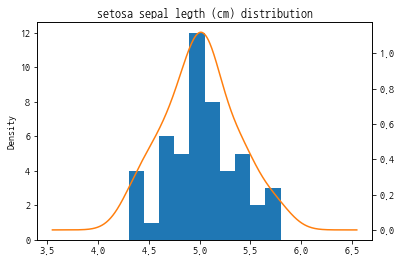

In [8]:
# secondary_y : 이중축
ax = setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True, 
                                    title='setosa sepal legth (cm) distribution')

<AxesSubplot:label='cf51e31c-d100-4ccb-a08b-398d37bd9421'>

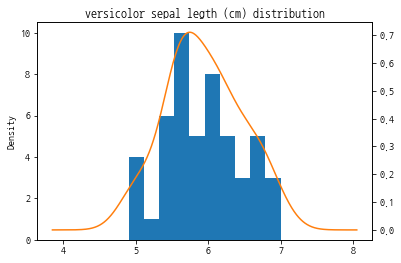

In [9]:
ax = versicolor_df['sepal length (cm)'].plot(kind='hist')
versicolor_df['sepal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True, 
                                    title='versicolor sepal legth (cm) distribution')

<AxesSubplot:label='d1fe83c8-e96f-4bbf-a91f-6c5c47e4ad58'>

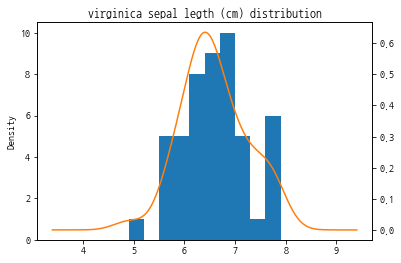

In [10]:
ax = virginica_df['sepal length (cm)'].plot(kind='hist')
virginica_df['sepal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True, 
                                    title='virginica sepal legth (cm) distribution')

#### 꽃받침 너비

<AxesSubplot:label='6c96583b-f504-4672-afb0-7e2342b7464c'>

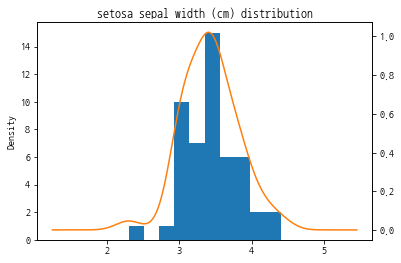

In [11]:
ax = setosa_df['sepal width (cm)'].plot(kind='hist')
setosa_df['sepal width (cm)'].plot(kind='kde', ax=ax, secondary_y=True, 
                                    title='setosa sepal width (cm) distribution')

<AxesSubplot:label='da05e8e8-ca8f-4bd1-99b6-00b4ba33a0fa'>

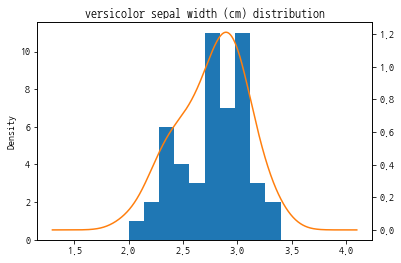

In [12]:
ax = versicolor_df['sepal width (cm)'].plot(kind='hist')
versicolor_df['sepal width (cm)'].plot(kind='kde', ax=ax, secondary_y=True, 
                                    title='versicolor sepal width (cm) distribution')

<AxesSubplot:label='649e7f19-ed33-4dfd-a7bb-4ba45428482a'>

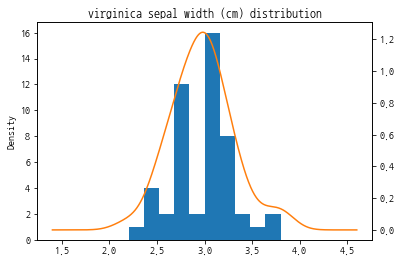

In [13]:
ax = virginica_df['sepal width (cm)'].plot(kind='hist')
virginica_df['sepal width (cm)'].plot(kind='kde', ax=ax, secondary_y=True, 
                                    title='virginica sepal width (cm) distribution')

#### 꽃잎 길이

<AxesSubplot:label='6ff02982-c24f-4555-b752-7e6dace6e826'>

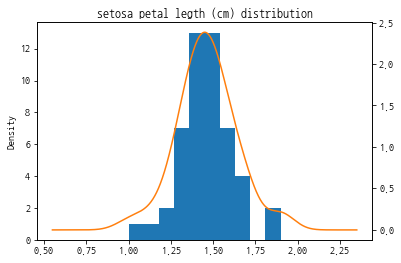

In [14]:
ax = setosa_df['petal length (cm)'].plot(kind='hist')
setosa_df['petal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True, 
                                    title='setosa petal legth (cm) distribution')

<AxesSubplot:label='1fc70f4c-a450-4876-bd03-3f72d0bbf921'>

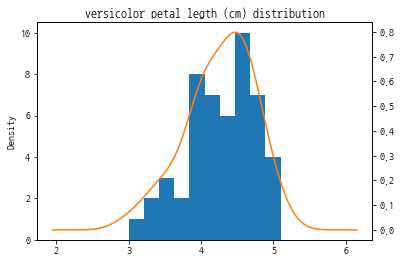

In [15]:
ax = versicolor_df['petal length (cm)'].plot(kind='hist')
versicolor_df['petal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True, 
                                    title='versicolor petal legth (cm) distribution')

<AxesSubplot:label='d2cad356-ec1a-4ea5-b3b2-556ca2abea6a'>

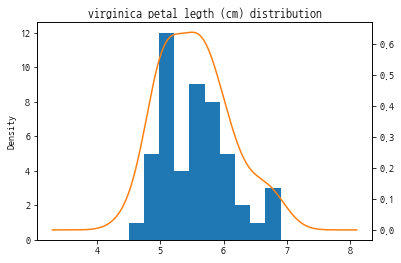

In [16]:
ax = virginica_df['petal length (cm)'].plot(kind='hist')
virginica_df['petal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True, 
                                    title='virginica petal legth (cm) distribution')

#### 꽃잎 너비

<AxesSubplot:label='c061b6a6-a948-4438-9aee-26c560e65eea'>

C:\Users\circl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\circl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


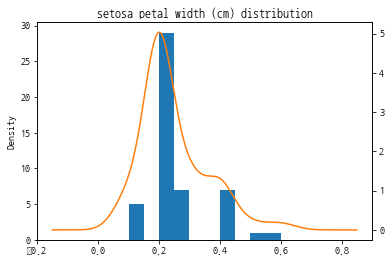

In [17]:
ax = setosa_df['petal width (cm)'].plot(kind='hist')
setosa_df['petal width (cm)'].plot(kind='kde', ax=ax, secondary_y=True, 
                                    title='setosa petal width (cm) distribution')

<AxesSubplot:label='a5481374-d5c8-49e6-ad70-600e9fca26fb'>

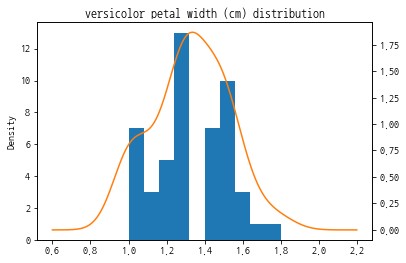

In [18]:
ax = versicolor_df['petal width (cm)'].plot(kind='hist')
versicolor_df['petal width (cm)'].plot(kind='kde', ax=ax, secondary_y=True, 
                                    title='versicolor petal width (cm) distribution')

<AxesSubplot:label='edb0a79f-4f67-4b10-bb4a-e0f356532715'>

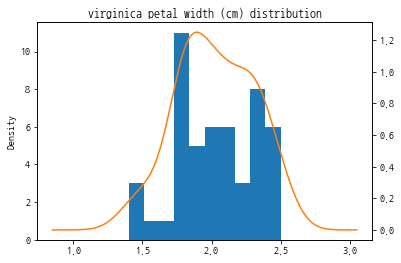

In [19]:
ax = virginica_df['petal width (cm)'].plot(kind='hist')
virginica_df['petal width (cm)'].plot(kind='kde', ax=ax, secondary_y=True, 
                                    title='virginica petal width (cm) distribution')

### 1.4. 데이터 나누기

전체 데이터의 20%를 테스트 데이터로 분리하고 나머지 80%를 학습에 사용한다.

In [20]:
# dataset.data : 데이터
# dataset.target : 결과값
X_train, X_test, Y_train, Y_test = train_test_split(dataset.data, dataset.target,
                                                   test_size = 0.2)
print('X_train : {}, X_test : {}'.format(len(X_train), len(X_test)))
print('Y_train : {}, Y_test : {}'.format(len(Y_train), len(Y_test)))
print('sepal legth, sepal width, petal length, petal width : {}, target : {}'
      .format(X_train[0], Y_train[0]))

X_train : 120, X_test : 30
Y_train : 120, Y_test : 30
sepal legth, sepal width, petal length, petal width : [6.1 3.  4.9 1.8], target : 2


### 1.5. 가우시안 나이브베이즈 모델 학습

In [21]:
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

### 1.6. 테스트

In [22]:
# 학습 결과에 따른 테스트 데이터의 예측값
prep = model.predict(X_test)
# Y_test : 테스트 데이터 실제값, prep : 예측값
print(metrics.classification_report(Y_test, prep))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      1.00      0.89         8
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30



-> 과적합 의심해볼 만 하다. F1값을 확인해볼 필요있다.

In [23]:
print('accuracy : {}'.format(accuracy_score(Y_test, prep)))

accuracy : 0.9333333333333333


In [24]:
comparison = pd.DataFrame({'실제값': Y_test, '예측값': prep})
comparison

,실제값,예측값
0,2,2
1,1,1
2,2,2
3,2,2
4,0,0
5,0,0
6,0,0
7,1,1
8,1,1
9,1,1


## 2. 베르누이 나이브베이즈를 활용한 스팸 메일 분류

이메일 제목과 레이블(스팸 여부) 데이터를 활용해 베르누이 나이브베이즈 분류로 스팸 메일을 분류한다.

### 2.0. 환경 설정

In [25]:
import numpy as np
import pandas as pd

# 베르누이 나이브베이즈를 위한 라이브러리를 import  한다.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB

# 모델 정확도 평가를 위해 import 한다.
from sklearn.metrics import accuracy_score

### 2.1. 학습 데이터 불러오기

간단한 스팸 메일 분류를 위해 다음과 같이 이메일 제목과 스팸 메일 레이블이 있는 데이터를 사
용한다.

email title : 이메일 제목
spam : 스팸 메일 여부(True : 스팸 메일, False : 스팸 메일 아님)

In [26]:
email_list = [
    {'email title' : 'free game only today', 'spam' : True},
    {'email title' : 'cheapest flight deal', 'spam' : True},
    {'email title' : 'limited time offer only today only today', 'spam' : True},
    {'email title' : 'today meeting schedule', 'spam' : False},
    {'email title' : 'your flight schedule attached', 'spam' : False},
    {'email title' : 'your credit card statement', 'spam' : False}
]

df = pd.DataFrame(email_list)
df

,email title,spam
0,free game only today,True
1,cheapest flight deal,True
2,limited time offer only today only today,True
3,today meeting schedule,False
4,your flight schedule attached,False
5,your credit card statement,False


### 2.2. 학습 데이터 다듬기

사이킷런의 베르누이 나이브베이즈 분류기(BernoulliNB)는 숫자만 다루기 때문에 True와 False를 1과 0으로 치환한다.

이메일 제목(email title)으로 학습을 진행하고 레이블은 label을 사용해서 스팸 메일인지 여부를 판단한다.

In [27]:
df['label'] = df.spam.map({True:1, False:0})
df

,email title,spam,label
0,free game only today,True,1
1,cheapest flight deal,True,1
2,limited time offer only today only today,True,1
3,today meeting schedule,False,0
4,your flight schedule attached,False,0
5,your credit card statement,False,0


### 2.3. 학습 데이터 분리하기

학습에 사용할 데이터와 레이블로 값을 분리한다.

In [28]:
df_x = df['email title']
df_y = df['label']

베르누이 나이즈베이즈의 입력 데이터는 고정된 크기의 벡터이여야 한다.

사이킷런의 CountVectorizer() 함수를 사용하면 데이터에 출현한 모든 단어의 개수만큼의 크기를 가진 벡터를 만들고 고정된 벡터로 표현한다.

In [29]:
# CountVectorizer() 함수는 이메일 제목에 출현한 단어를 오름차순으로 정렬해 단어의 위치로 행렬을 만들어 리턴한다.
# CountVectorizer() 함수 옵션으로 binary=True를 지정하면 같은 단어가 여러변 출현하더라도 무조건 1을 리턴한다.
cv = CountVectorizer(binary=True)
x_train = cv.fit_transform(df_x)
# x_train

# numpy 타입의 데이터로 변환한다.
encoded_input = x_train.toarray()
encoded_input

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]], dtype=int64)

> 위의 행렬에서 볼 수 있듯이 이메일 제목에서 총 17개의 단어가 발견되어 각 이메일 제목이 17개 크기의 벡터로 인코딩(표현)된 것을 확인할 수 있다. 또한 베르누이 나이브베이즈에서 사용하기 위해 이메일 제목에 중복되는 단어가 있더라도 중복된 횟수로 표현된 것이 아니라 단순히 1로 표현되는 것을 알 수 있다.

inverse_transform() 메소드로 고정된 크기의 벡터에 포함된 단어를 확인한다.

In [30]:
print(cv.inverse_transform(encoded_input))

[array(['free', 'game', 'only', 'today'], dtype='<U9'), array(['cheapest', 'deal', 'flight'], dtype='<U9'), array(['limited', 'offer', 'only', 'time', 'today'], dtype='<U9'), array(['meeting', 'schedule', 'today'], dtype='<U9'), array(['attached', 'flight', 'schedule', 'your'], dtype='<U9'), array(['card', 'credit', 'statement', 'your'], dtype='<U9')]


get_feature_names() 메소드로 각 인덱스에 해당되는 단어를 알 수 있다.

In [31]:
print(cv.get_feature_names())

['attached', 'card', 'cheapest', 'credit', 'deal', 'flight', 'free', 'game', 'limited', 'meeting', 'offer', 'only', 'schedule', 'statement', 'time', 'today', 'your']


### 2.4. 베르누이 나이브베이즈 모델 학습하기

사이킷런의 베르누이 나이브베이즈 분류기는 기본적으로 스무딩을 지원하므로 학습 데이터에 없던 단어가 테스트 데이터에 있어도 분류가 잘 진행된다.

+ 라플라스 스무딩(Laplace Smoothing)

    0이란 수는 곱셈과 나숫셈을 무력화시키는 값이므로 그 전에 아무리 의미 있는 값이 도출된다 하더라도 마지막에 0을 곱해버리면 값은 0이 나온다
    
    이런 경우가 상당히 빈번하기 때문에 값이 0이 아닌 최솟값(1회 등장)으로 보정을 하게 되는데 이를 라플라스 스무딩이라 한다.

In [32]:
bnb = BernoulliNB()
bnb.fit(x_train, df_y)

BernoulliNB()

### 2.5. 테스트 데이터 다듬기

In [33]:
test_email_list = [
    {'email title' : 'free flight offer', 'spam' : True},
    {'email title' : 'hey traveler free flight deal', 'spam' : True},
    {'email title' : 'limited free game offer', 'spam' : True},
    {'email title' : 'today flight schedule', 'spam' : False},
    {'email title' : 'your credit card attached', 'spam' : False},
    {'email title' : 'free credit card offer only today', 'spam' : False}
]

test_df = pd.DataFrame(test_email_list)
test_df

,email title,spam
0,free flight offer,True
1,hey traveler free flight deal,True
2,limited free game offer,True
3,today flight schedule,False
4,your credit card attached,False
5,free credit card offer only today,False


In [34]:
test_df['label'] = test_df.spam.map({True:1, False:0})
test_df

,email title,spam,label
0,free flight offer,True,1
1,hey traveler free flight deal,True,1
2,limited free game offer,True,1
3,today flight schedule,False,0
4,your credit card attached,False,0
5,free credit card offer only today,False,0


In [35]:
test_x = test_df['email title']
test_y = test_df['label']

In [36]:
x_test = cv.transform(test_x)
y_test = test_y.astype('int')

### 2.6. 테스트 데이터 테스트하기

In [37]:
pred = bnb.predict(x_test)

In [38]:
print('정확도(accuracy): {}'.format(accuracy_score(y_test, pred)))

정확도(accuracy): 0.8333333333333334


In [39]:
comparison = pd.DataFrame({'실제값':y_test, '예측값':pred})
comparison

,실제값,예측값
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
5,0,1


## 3. 다항분포 나이브베이즈를 활용한 영화 리뷰 분류

영화 리뷰에 다항분포 나이브베이즈를 활용해 영화 리뷰가 긍적적인지 부정적인지 분류한다.

### 3.1. 환경 설정

In [40]:
import numpy as np
import pandas as pd

# 다항분포 나이브베이즈를 위한 라이브러리를 import한다.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# 모델 정확도 평가를 위해 import한다.
from sklearn.metrics import accuracy_score

### 3.2. 학습 데이터 불러오기

    movie_review : 영화 감상평
    type : 감상평이 긍정적(positive)인지 부정적(negative)인지 나타냄

In [41]:
review_list = [
    {'movie_review' : 'this is great great movie. I will watch again', 'type' : 'positive'},
    {'movie_review' : 'I like this movie', 'type' : 'positive'},
    {'movie_review' : 'amazing movie in this year', 'type' : 'positive'},
    {'movie_review' : 'cool my boyfriend also said the movie is cool', 'type' : 'positive'},
    {'movie_review' : 'awesome of the awesome movie ever', 'type' : 'positive'},
    {'movie_review' : 'shame I wasted money and time', 'type' : 'negative'},
    {'movie_review' : 'regret on this move. I will never never what movie from this director', 'type' : 'negative'},
    {'movie_review' : 'I do not like this movie', 'type' : 'negative'},
    {'movie_review' : 'I do not like actors in this movie', 'type' : 'negative'},
    {'movie_review' : 'boring boring sleeping movie', 'type' : 'negative'}
]

df = pd.DataFrame(review_list)
df

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


### 3.3. 학습 데이터 다듬기

사이킷런의 다항분포 나이브베이즈 분류기(MultinomialNB)는 숫자만 다루기 때문에 positive와 negative를 각각 1과 0으로 치환한다.

In [42]:
df['label'] = df['type'].map({'positive': 1, 'negative': 0 })
df

,movie_review,type,label
0,this is great great movie. I will watch again,positive,1
1,I like this movie,positive,1
2,amazing movie in this year,positive,1
3,cool my boyfriend also said the movie is cool,positive,1
4,awesome of the awesome movie ever,positive,1
5,shame I wasted money and time,negative,0
6,regret on this move. I will never never what m...,negative,0
7,I do not like this movie,negative,0
8,I do not like actors in this movie,negative,0
9,boring boring sleeping movie,negative,0


학습에 사용할 데이터와 레이블로 분리한다.

In [43]:
df_x = df['movie_review']
df_y = df['label']

다항분포 나이브베이즈의 입력 데이터는 고정된 크기의 벡터로서 각 인덱스는 단어의 빈도수를 나타내야 한다. 

사이킷런의  CountVectorizer() 메소드를 사용하면 데이터에 출현한 모든 단어의 개수 만큼의 크기를 가진 벡터를 만들고 고정된 벡터로 표현한다.

In [44]:
# CountVectorizer() : 출현한 단어를 오름차순으로 정렬해 단어의 위피로 행렬을 만든다.
cv = CountVectorizer()
x_train = cv.fit_transform(df_x)
encoded_input = x_train.toarray()
encoded_input

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
        0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

고정된 크기의 벡터에 포함된 단어를 확인한다.

In [45]:
print(cv.inverse_transform(encoded_input))

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
      dtype='<U9'), array(['like', 'movie', 'this'], dtype='<U9'), array(['amazing', 'in', 'movie', 'this', 'year'], dtype='<U9'), array(['also', 'boyfriend', 'cool', 'is', 'movie', 'my', 'said', 'the'],
      dtype='<U9'), array(['awesome', 'ever', 'movie', 'of', 'the'], dtype='<U9'), array(['and', 'money', 'shame', 'time', 'wasted'], dtype='<U9'), array(['director', 'from', 'move', 'movie', 'never', 'on', 'regret',
       'this', 'what', 'will'], dtype='<U9'), array(['do', 'like', 'movie', 'not', 'this'], dtype='<U9'), array(['actors', 'do', 'in', 'like', 'movie', 'not', 'this'], dtype='<U9'), array(['boring', 'movie', 'sleeping'], dtype='<U9')]


각 인덱스에 해당하는 단어를 확인하여 고정된 벡터의 각 인덱스가 어떤 단어를 의미하는지를 알 수 있다.

In [46]:
print(cv.get_feature_names())

['actors', 'again', 'also', 'amazing', 'and', 'awesome', 'boring', 'boyfriend', 'cool', 'director', 'do', 'ever', 'from', 'great', 'in', 'is', 'like', 'money', 'move', 'movie', 'my', 'never', 'not', 'of', 'on', 'regret', 'said', 'shame', 'sleeping', 'the', 'this', 'time', 'wasted', 'watch', 'what', 'will', 'year']


### 3.4. 다항분포 나이브베이즈 모델 학습하기

In [47]:
mnb = MultinomialNB()
y_train = df_y.astype('int')
mnb.fit(x_train, y_train)

MultinomialNB()

### 3.5. 테스트 데이터 다듬기

In [48]:
test_feedback_list = [
    {'movie_review': 'great great great movie ever', 'type': 'positive'},
    {'movie_review': 'I like this amazing movie', 'type': 'positive'},
    {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
    {'movie_review': 'cool cool cool', 'type': 'positive'},
    {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
    {'movie_review': 'shame shame shame', 'type': 'negative'},
    {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
    {'movie_review': 'do not like this movie', 'type': 'negative'},
    {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
    {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
]

test_df = pd.DataFrame(test_feedback_list)
test_df

,movie_review,type
0,great great great movie ever,positive
1,I like this amazing movie,positive
2,my boyfriend said great movie ever,positive
3,cool cool cool,positive
4,awesome boyfriend said cool movie ever,positive
5,shame shame shame,negative
6,awesome director shame movie boring movie,negative
7,do not like this movie,negative
8,I do not like this boring movie,negative
9,aweful terrible boring movie,negative


In [49]:
test_df['label'] = test_df['type'].map({'positive': 1, 'negative': 0})
test_df

,movie_review,type,label
0,great great great movie ever,positive,1
1,I like this amazing movie,positive,1
2,my boyfriend said great movie ever,positive,1
3,cool cool cool,positive,1
4,awesome boyfriend said cool movie ever,positive,1
5,shame shame shame,negative,0
6,awesome director shame movie boring movie,negative,0
7,do not like this movie,negative,0
8,I do not like this boring movie,negative,0
9,aweful terrible boring movie,negative,0


In [50]:
test_x = test_df['movie_review']
test_y = test_df['label']

In [51]:
x_test = cv.transform(test_x)
y_test = test_y.astype('int')

### 3.6. 테스트 데이터 테스트하기

In [52]:
pred = mnb.predict(x_test)

In [53]:
print('정확도: {}'.format(accuracy_score(y_test, pred)))

정확도: 1.0


In [54]:
comparison = pd.DataFrame({'실제값':y_test, '예측값':pred})
comparison

,실제값,예측값
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
